# Summary of Fan-In

Define the individual files for each Fan-In rate

In [1]:
ConfigFilesFT = {50:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_50.csv',
               100:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_100.csv',
               #200:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_200.csv',
               500:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_500.csv',
               1000:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_1000.csv',
               2000:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_2000.csv'}
ConfigFilesAT = {50:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_50_AT.csv',
               100:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_100_AT.csv',
               #200:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_200_AT.csv',
               #500:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_500_AT.csv',
               1000:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_1000_AT.csv',
               2000:'../../results/GoCFanIn/EA_individuals_mfgoc_fanin_2000_AT.csv'}
number_of_parameters = 2
number_of_features = 2
parameters_to_plot_2D = [0,1]
labels = ['MF-GrC Max Weight (nS)', 'MF-GrC LTD/LTP ratio']
import numpy
import matplotlib.pyplot as plt

Load the configuration files and store the information transmission and parameters

In [2]:
FanInFT = ConfigFilesFT.keys()
InfRatioFT = []
MaxWeightFT = []
LTDRatioFT = []
for fanin,filename in ConfigFilesFT.iteritems():
    data = numpy.loadtxt(filename)
    print 'Fanin',fanin,'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
    parameters = data[:,:number_of_parameters]
    output = data[:,number_of_parameters:]
    hall_of_fame = numpy.argsort(output[:,0])[-1]
    print "Parameters:",parameters[hall_of_fame,:],"Features:",output[hall_of_fame,:]
    InfRatioFT.append(output[hall_of_fame,0])
    MaxWeightFT.append(parameters[hall_of_fame,0])
    LTDRatioFT.append(parameters[hall_of_fame,1])
sortfanin = numpy.argsort(FanInFT)
FanInFT = numpy.array(FanInFT)[sortfanin]
InfRatioFT = numpy.array(InfRatioFT)[sortfanin]
MaxWeightFT = numpy.array(MaxWeightFT)[sortfanin]
LTDRatioFT = numpy.array(LTDRatioFT)[sortfanin]

Fanin 1000 Loaded 4 columns and 1560 rows
Parameters: [1.62375133e-09 1.33556742e+00] Features: [0.59572151 0.02751556]
Fanin 500 Loaded 4 columns and 1192 rows
Parameters: [2.94842433e-09 1.44062302e+00] Features: [0.41148771 0.0315638 ]
Fanin 50 Loaded 4 columns and 1123 rows
Parameters: [1.16399658e-08 1.43885473e+00] Features: [0.04245569 0.00972876]
Fanin 100 Loaded 4 columns and 1607 rows
Parameters: [7.20144939e-09 1.28200443e+00] Features: [0.08823836 0.01735769]
Fanin 2000 Loaded 4 columns and 1050 rows
Parameters: [7.42656197e-10 1.38074701e+00] Features: [0.66411365 0.02541932]


Load the configuration files and store the information transmission and parameters

In [3]:
FanInAT = ConfigFilesAT.keys()
InfRatioAT = []
MaxWeightAT = []
LTDRatioAT = []
for fanin,filename in ConfigFilesAT.iteritems():
    data = numpy.loadtxt(filename)
    print 'Fanin',fanin,'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
    parameters = data[:,:number_of_parameters]
    output = data[:,number_of_parameters:]
    hall_of_fame = numpy.argsort(output[:,0])[-1]
    print "Parameters:",parameters[hall_of_fame,:],"Features:",output[hall_of_fame,:]
    InfRatioAT.append(output[hall_of_fame,0])
    MaxWeightAT.append(parameters[hall_of_fame,0])
    LTDRatioAT.append(parameters[hall_of_fame,1])
sortfanin = numpy.argsort(FanInAT)
FanInAT = numpy.array(FanInAT)[sortfanin]
InfRatioAT = numpy.array(InfRatioAT)[sortfanin]
MaxWeightAT = numpy.array(MaxWeightAT)[sortfanin]
LTDRatioAT = numpy.array(LTDRatioAT)[sortfanin]

Fanin 1000 Loaded 4 columns and 1566 rows
Parameters: [2.23195370e-09 9.25095472e-01] Features: [0.64667111 0.02842262]
Fanin 2000 Loaded 4 columns and 818 rows
Parameters: [1.15612198e-09 8.96627408e-01] Features: [0.67879718 0.02576517]
Fanin 50 Loaded 4 columns and 1439 rows
Parameters: [5.31004138e-08 1.00233810e+00] Features: [0.07338377 0.01442167]
Fanin 100 Loaded 4 columns and 1236 rows
Parameters: [2.17218654e-08 1.00393153e+00] Features: [0.20261161 0.01719637]


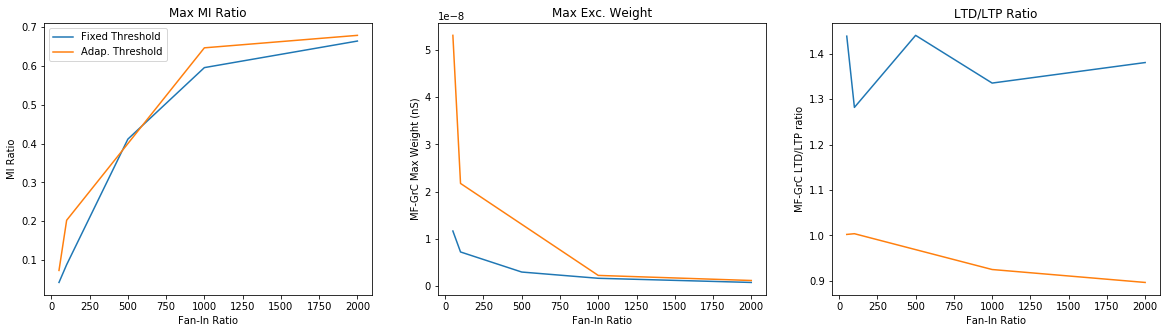

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(FanInFT,InfRatioFT,label='Fixed Threshold')
plt.plot(FanInAT,InfRatioAT,label='Adap. Threshold')
plt.title('Max MI Ratio')
plt.xlabel('Fan-In Ratio')
plt.ylabel('MI Ratio')
plt.legend()
plt.subplot(1,3,2)
plt.plot(FanInFT,MaxWeightFT,label='Fixed Threshold')
plt.plot(FanInAT,MaxWeightAT,label='Adap. Threshold')
plt.title('Max Exc. Weight')
plt.xlabel('Fan-In Ratio')
plt.ylabel(labels[0])
plt.subplot(1,3,3)
plt.plot(FanInFT,LTDRatioFT,label='Fixed Threshold')
plt.plot(FanInAT,LTDRatioAT,label='Adap. Threshold')
plt.title('LTD/LTP Ratio')
plt.xlabel('Fan-In Ratio')
plt.ylabel(labels[1])
plt.show()